In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv("C:\\Users\\91762\\Desktop\\Mini project\\data sets\\Rain fall data from 1901 to 2022.csv") 
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude,Minimum temperature (Degree C),Maximum temperature (Degree C),Quality
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165,11.0,22.3,N
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165,12.2,23.4,Y
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165,12.0,20.3,Y
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165,7.4,18.7,Y
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165,5.9,21.3,Y


In [3]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

In [5]:
# Assuming your data has features X and target variable y
X = numeric_data.drop('ANNUAL', axis=1)  # Adjust column name as needed
y = numeric_data['ANNUAL']

In [6]:
# Encode categorical variables (if any)
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Build the MLP model (similar to the previous example)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [10]:
# Compile the model
optimizer = Adam(lr=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50



88/88 [==============================] - 1s 3ms/step - loss: 2760630.5000 - val_loss: 2773607.5000
Epoch 2/50
88/88 [==============================] - 0s 1ms/step - loss: 2546765.7500 - val_loss: 2327311.5000
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 1821192.6250 - val_loss: 1340968.2500
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 928723.5000 - val_loss: 617103.8125
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 526377.5000 - val_loss: 381979.9688
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 374594.7500 - val_loss: 270326.2500
Epoch 7/50
88/88 [==============================] - 0s 1ms/step - loss: 287070.0312 - val_loss: 203231.3594
Epoch 8/50
88/88 [==============================] - 0s 1ms/step - loss: 228506.6094 - val_loss: 159638.6875
Epoch 9/50
88/88 [==============================] - 0s 1ms/step - loss: 185241.4688 - val_loss: 128460.7734
Epoch 10/50
88/88 [==============

In [12]:
# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

28/28 [==============================] - 0s 728us/step - loss: 5343.2979
Mean Squared Error on Test Data: 5343.2978515625


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

28/28 [==============================] - 0s 626us/step


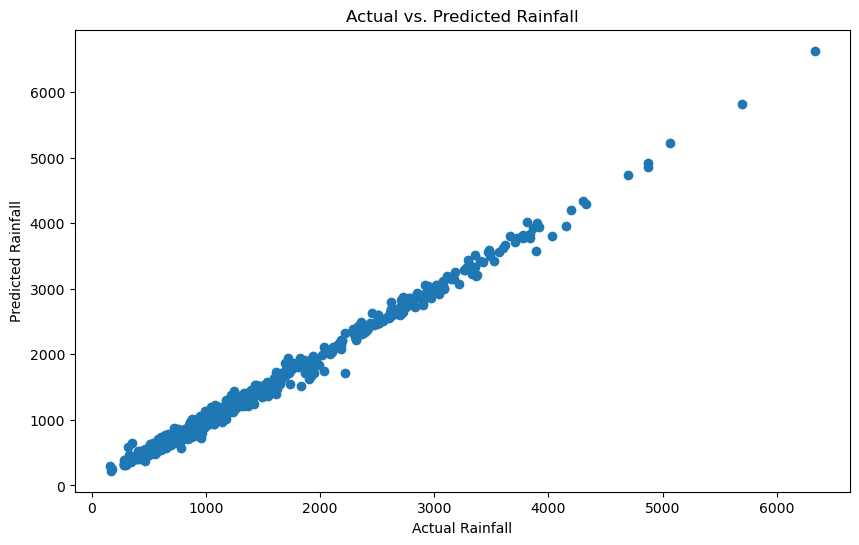

In [15]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

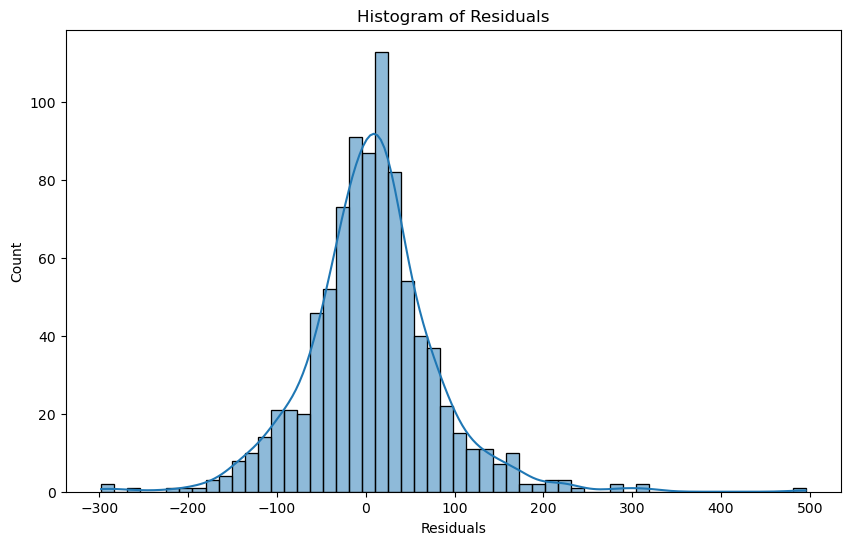

In [16]:
# Plot a histogram of the residuals
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

In [17]:
# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred.flatten())
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5343.297427074528


In [18]:
# Plot training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

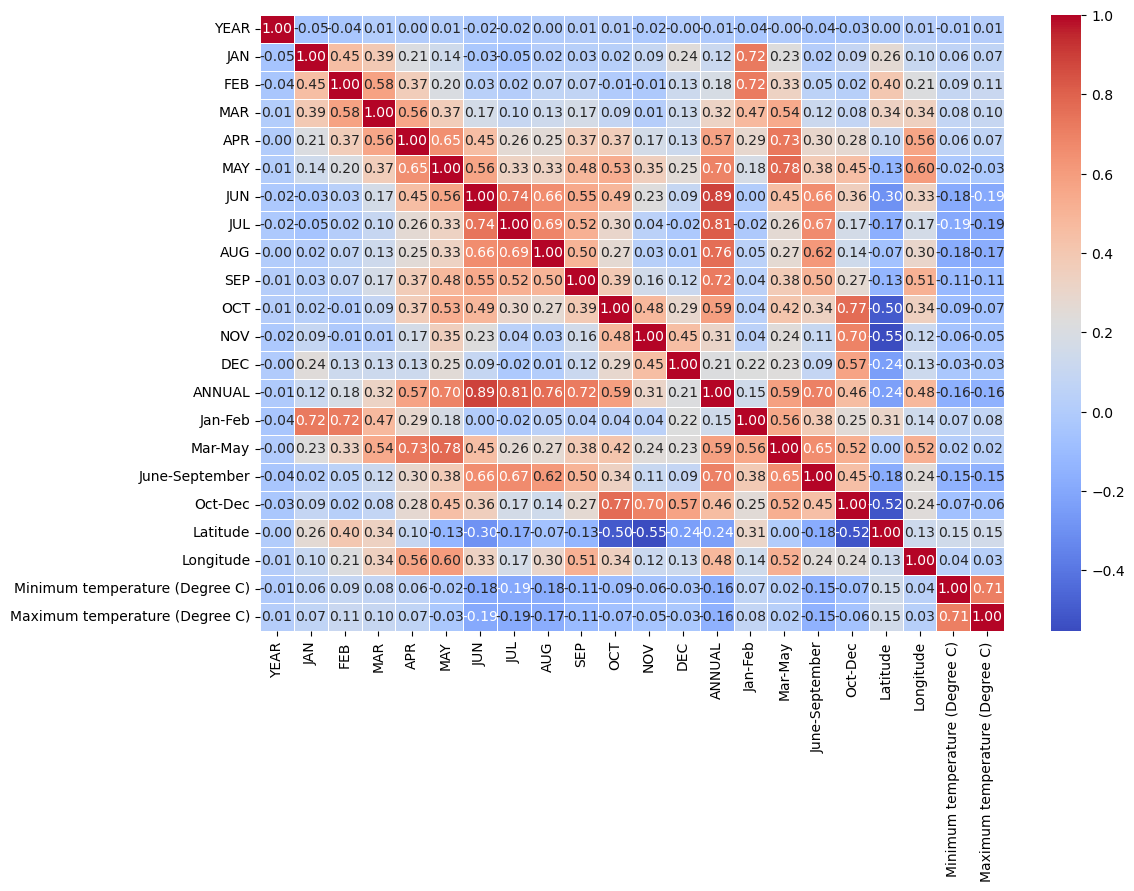

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


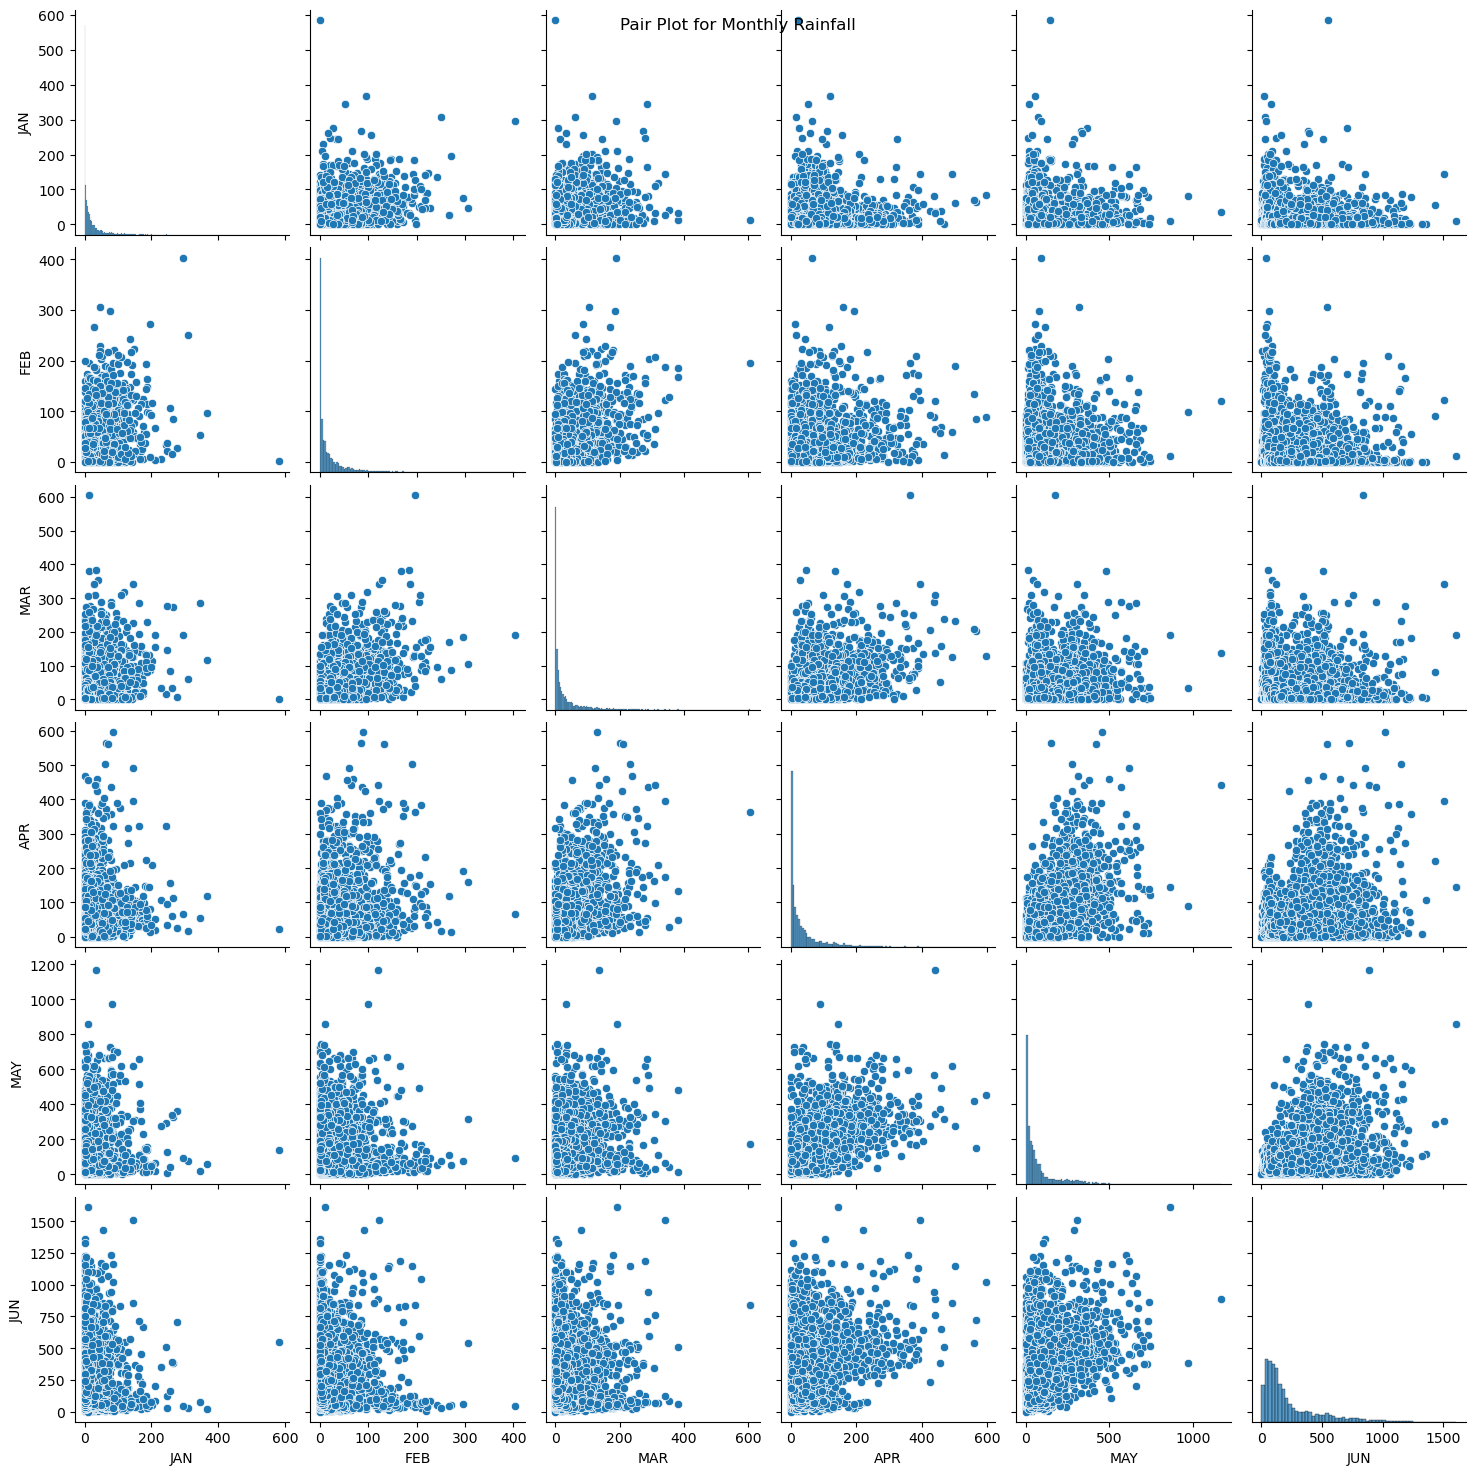

In [21]:
import seaborn as sns
# Pair plot for selected columns
sns.pairplot(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']])
plt.suptitle('Pair Plot for Monthly Rainfall')
plt.show()